In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from scipy.stats import boxcox

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE, SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [2]:
path_data = r"C:\Users\jeanb\Desktop\Cours\Cours Ironhack\Projets\project_8_clustering"
data = pd.read_csv(path_data+"/covtype.csv")

# Main steps

- Base checking (head, shape, nan...)
- Sample dataset
- Checking distribution
- Scaling numerical data
----- Df with cluster columns
- RFE to find the least important features (numerical data)
- Find optimal number of clusters
- Clustering on the least important features (numerical data)
- Add cluster columns to th df and delete original columns
- Run models with df

### Base checking (head, shape, nan...)

In [3]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data.shape

(581012, 55)

In [5]:
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


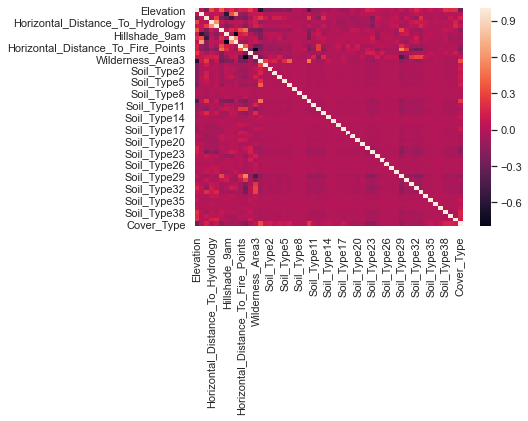

In [6]:
sns.heatmap(data.corr())

In [7]:
data.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

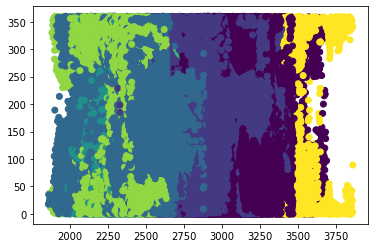

In [20]:
colormap=np.array(['Red','green','blue',"yellow","purple","black","orange"])
plt.scatter(data.Elevation, data.Aspect, c=data.Cover_Type)

Text(0, 0.5, 'Occurence of Cover type')

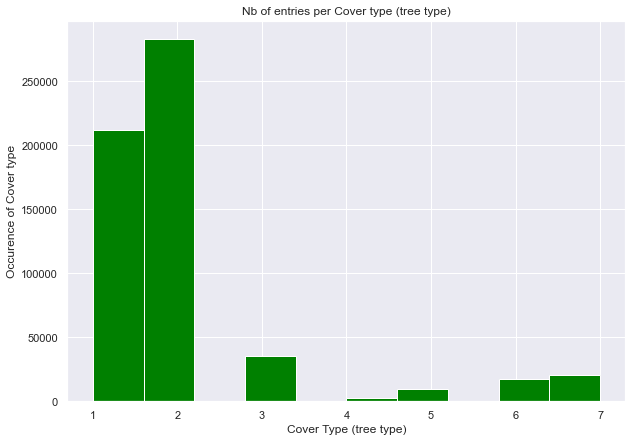

In [8]:
plt.figure(figsize=(10,7))
plt.title("Nb of entries per Cover type (tree type)")
data.Cover_Type.hist(color="green")
plt.xlabel('Cover Type (tree type)')
plt.ylabel('Occurence of Cover type')

In [9]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [10]:
data.iloc[:,:10].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8512187C8>],
      dtype=object)

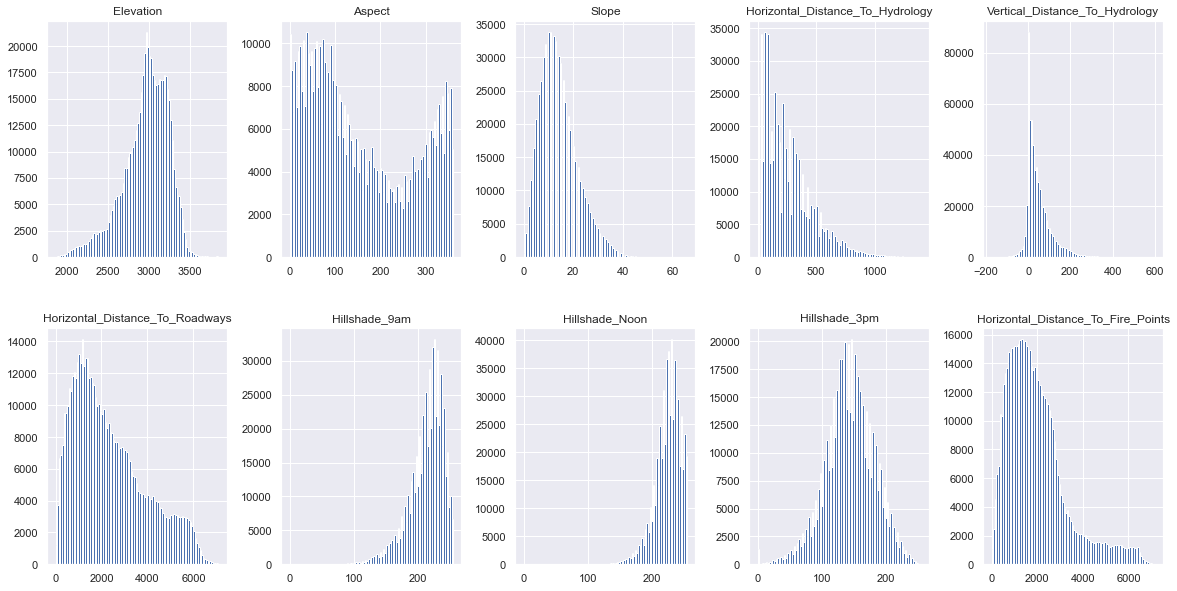

In [11]:
fig, axes = plt.subplots(2, 5, figsize =(20,10))

data.hist('Elevation', bins=100, ax=axes[0][0])
data.hist('Aspect', bins=100, ax=axes[0][1])
data.hist('Slope', bins=100, ax=axes[0][2])
data.hist('Horizontal_Distance_To_Hydrology', bins=100, ax=axes[0][3])
data.hist('Vertical_Distance_To_Hydrology', bins=100, ax=axes[0][4])

data.hist('Horizontal_Distance_To_Roadways', bins=100, ax=axes[1][0])
data.hist('Hillshade_9am', bins=100, ax=axes[1][1])
data.hist('Hillshade_Noon', bins=100, ax=axes[1][2])
data.hist('Hillshade_3pm', bins=100, ax=axes[1][3])
data.hist('Horizontal_Distance_To_Fire_Points', bins=100, ax=axes[1][4])

### Sampling data

Stratified sample (25000 rows)

In [69]:
data2 = data.sample(n=25000, weights='Cover_Type', random_state=1).reset_index(drop=True)

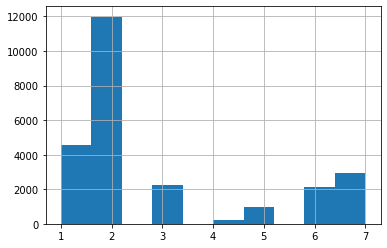

In [72]:
data2.Cover_Type.hist()

In [74]:
data2.Cover_Type.value_counts()

2    11981
1     4570
7     2911
3     2249
6     2105
5      969
4      215
Name: Cover_Type, dtype: int64

In [75]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002CA5B68AB08>],
      dtype=object)

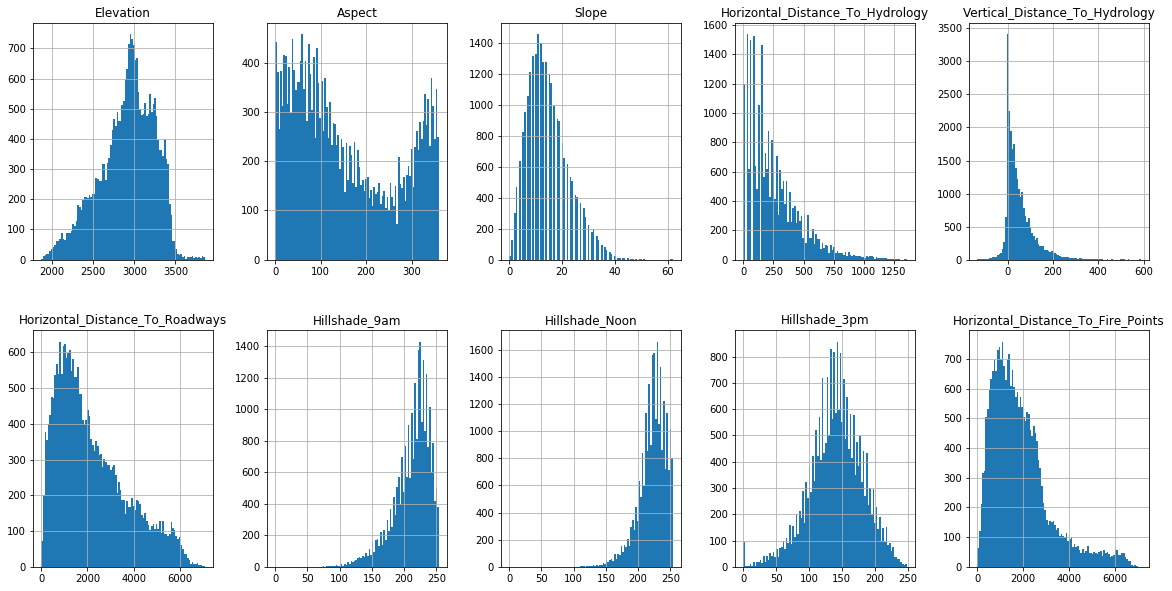

In [77]:
fig, axes = plt.subplots(2, 5, figsize =(20,10))

data2.hist('Elevation', bins=100, ax=axes[0][0])
data2.hist('Aspect', bins=100, ax=axes[0][1])
data2.hist('Slope', bins=100, ax=axes[0][2])
data2.hist('Horizontal_Distance_To_Hydrology', bins=100, ax=axes[0][3])
data2.hist('Vertical_Distance_To_Hydrology', bins=100, ax=axes[0][4])

data2.hist('Horizontal_Distance_To_Roadways', bins=100, ax=axes[1][0])
data2.hist('Hillshade_9am', bins=100, ax=axes[1][1])
data2.hist('Hillshade_Noon', bins=100, ax=axes[1][2])
data2.hist('Hillshade_3pm', bins=100, ax=axes[1][3])
data2.hist('Horizontal_Distance_To_Fire_Points', bins=100, ax=axes[1][4])

Equal classes sample

In [12]:
data3 = data.groupby('Cover_Type')
data3=data3.apply(lambda x: x.sample(data3.size().min(), random_state = 1)).reset_index(drop=True)

In [13]:
data3

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3160,347,13,127,15,4621,196,219,162,3139,...,0,0,0,0,0,0,0,0,0,1
1,3100,352,9,170,14,5367,205,225,158,1167,...,0,0,0,0,0,0,0,0,0,1
2,2675,31,11,212,20,3360,217,216,133,3072,...,0,0,0,0,0,0,0,0,0,1
3,3088,43,8,0,0,1611,222,222,136,674,...,0,0,0,0,0,0,0,0,0,1
4,3061,113,22,150,19,696,251,212,78,742,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3506,110,31,371,113,2300,254,190,39,3475,...,0,0,0,0,0,0,0,0,1,7
19225,3181,60,10,60,20,2590,228,218,122,2837,...,0,0,0,0,0,0,0,0,0,7
19226,3331,181,12,42,6,4475,224,247,155,3313,...,0,1,0,0,0,0,0,0,0,7
19227,3226,65,35,510,230,693,229,149,24,2002,...,0,0,0,0,0,0,0,0,0,7


In [14]:
data3.Cover_Type.value_counts()

7    2747
6    2747
5    2747
4    2747
3    2747
2    2747
1    2747
Name: Cover_Type, dtype: int64

### Checking distribution

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A85139ECC8>],
      dtype=object)

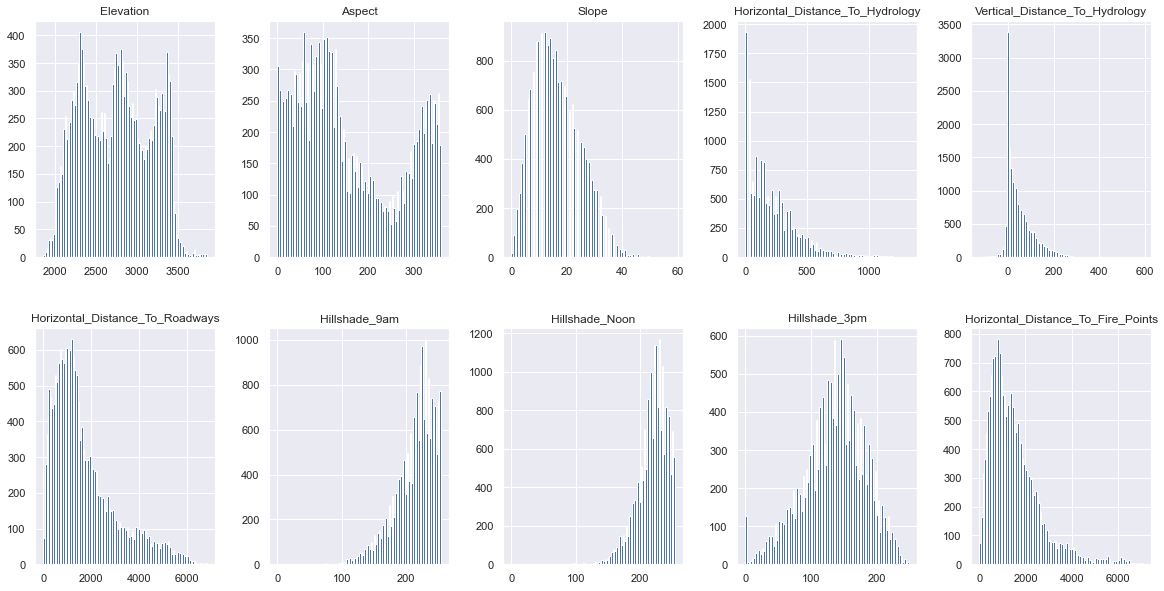

In [15]:
fig, axes = plt.subplots(2, 5, figsize =(20,10))

data3.hist('Elevation', bins=100, ax=axes[0][0])
data3.hist('Aspect', bins=100, ax=axes[0][1])
data3.hist('Slope', bins=100, ax=axes[0][2])
data3.hist('Horizontal_Distance_To_Hydrology', bins=100, ax=axes[0][3])
data3.hist('Vertical_Distance_To_Hydrology', bins=100, ax=axes[0][4])

data3.hist('Horizontal_Distance_To_Roadways', bins=100, ax=axes[1][0])
data3.hist('Hillshade_9am', bins=100, ax=axes[1][1])
data3.hist('Hillshade_Noon', bins=100, ax=axes[1][2])
data3.hist('Hillshade_3pm', bins=100, ax=axes[1][3])
data3.hist('Horizontal_Distance_To_Fire_Points', bins=100, ax=axes[1][4])

In [16]:
data3.iloc[:,:10].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,19229.0,2746.987519,418.113343,1863.0,2372.0,2754.0,3104.0,3853.0
Aspect,19229.0,156.795881,109.906082,0.0,66.0,126.0,261.0,360.0
Slope,19229.0,16.549067,8.510578,0.0,10.0,15.0,22.0,59.0
Horizontal_Distance_To_Hydrology,19229.0,226.280826,206.463321,0.0,67.0,180.0,330.0,1323.0
Vertical_Distance_To_Hydrology,19229.0,50.847938,60.980528,-126.0,5.0,32.0,79.0,592.0
Horizontal_Distance_To_Roadways,19229.0,1721.950283,1334.163629,0.0,760.0,1318.0,2300.0,6843.0
Hillshade_9am,19229.0,212.871912,30.520103,0.0,196.0,220.0,236.0,254.0
Hillshade_Noon,19229.0,218.885589,22.963193,0.0,207.0,223.0,235.0,254.0
Hillshade_3pm,19229.0,134.722971,46.058744,0.0,107.0,138.0,167.0,248.0
Horizontal_Distance_To_Fire_Points,19229.0,1517.991107,1109.098660,0.0,730.0,1266.0,1991.0,7080.0


### Data scaling

In [17]:
col_to_scale = data3.iloc[:,:10]
dummies_y = data3.iloc[:,10:]

scaler = StandardScaler()
scaler.fit(col_to_scale)
col_scaled = pd.DataFrame(scaler.transform(col_to_scale), columns=col_to_scale.columns)

data4 = pd.concat([col_scaled,dummies_y], axis=1)

In [18]:
data4

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0.987826,1.730651,-0.417029,-0.480877,-0.587874,2.172991,-0.552827,0.004982,0.592238,1.461593,...,0,0,0,0,0,0,0,0,0,1
1,0.844320,1.776146,-0.887045,-0.272602,-0.604273,2.732157,-0.257932,0.266277,0.505390,-0.316473,...,0,0,0,0,0,0,0,0,0,1
2,-0.172177,-1.144606,-0.652037,-0.069171,-0.505879,1.227805,0.135262,-0.125665,-0.037409,1.401182,...,0,0,0,0,0,0,0,0,0,1
3,0.815619,-1.035419,-1.004549,-1.096014,-0.833861,-0.083163,0.299092,0.135630,0.027727,-0.760990,...,0,0,0,0,0,0,0,0,0,1
4,0.751042,-0.398495,0.640506,-0.369474,-0.522278,-0.769004,1.249310,-0.299861,-1.231567,-0.699677,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,1.815374,-0.425792,1.698041,0.700962,1.019238,0.433279,1.347609,-1.257941,-2.078334,1.764550,...,0,0,0,0,0,0,0,0,1,7
19225,1.038053,-0.880737,-0.769541,-0.805398,-0.505879,0.650649,0.495689,-0.038567,-0.276241,1.189293,...,0,0,0,0,0,0,0,0,0,7
19226,1.396817,0.220231,-0.534533,-0.892583,-0.735466,2.063556,0.364624,1.224357,0.440254,1.618481,...,0,1,0,0,0,0,0,0,0,7
19227,1.145682,-0.835243,2.168056,1.374223,2.937933,-0.771253,0.528455,-3.043453,-2.404014,0.436410,...,0,0,0,0,0,0,0,0,0,7


### Feature selection - RFE &  Kbest

In [19]:
X = data4.iloc[:,:10]
y = data4.Cover_Type

In [20]:
f=4
# RFE
estimator = RandomForestClassifier(n_estimators=10)
rfe_selection = RFE(estimator, f)
rfe_selection.fit(X,y)
rfe_result = list(X.columns[~rfe_selection.support_])

# KBest
kbest_selection = SelectKBest(f_classif, k=f).fit(X,y)
kbest_result = list(X.columns[~kbest_selection.get_support()])

In [21]:
rfe_result

['Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm']

In [22]:
kbest_result

['Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_Noon',
 'Hillshade_3pm']

In [23]:
lif = [i for i in list(X.columns) if (i in rfe_result) & (i in kbest_result)]

Selecting less important columns for clustering

In [24]:
data4_lif = data4[lif]

In [25]:
data4_lif

,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Hillshade_3pm
0,-0.417029,-0.480877,-0.587874,0.004982,0.592238
1,-0.887045,-0.272602,-0.604273,0.266277,0.505390
2,-0.652037,-0.069171,-0.505879,-0.125665,-0.037409
3,-1.004549,-1.096014,-0.833861,0.135630,0.027727
4,0.640506,-0.369474,-0.522278,-0.299861,-1.231567
...,...,...,...,...,...
19224,1.698041,0.700962,1.019238,-1.257941,-2.078334
19225,-0.769541,-0.805398,-0.505879,-0.038567,-0.276241
19226,-0.534533,-0.892583,-0.735466,1.224357,0.440254
19227,2.168056,1.374223,2.937933,-3.043453,-2.404014


### Clustering least important features

Optimal number of clusters

In [26]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data4_lif)
    Sum_of_squared_distances.append(km.inertia_)

In [27]:
Sum_of_squared_distances

[96145.0,
 68418.16398284538,
 50801.8409254351,
 44107.89520271391,
 38977.699403699706,
 34811.20942851566,
 32207.470540530394,
 30223.872299471408,
 28355.355672172205,
 26847.425675046547,
 25684.967626528272,
 24584.12507786762,
 23624.30601820224,
 22824.65874062067]

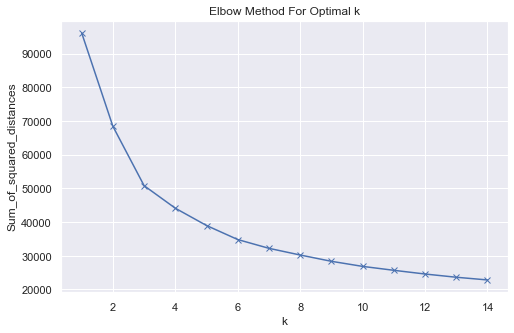

In [28]:
plt.figure(figsize=(8,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data4_lif)

y_kmeans = kmeans.predict(data4_lif)

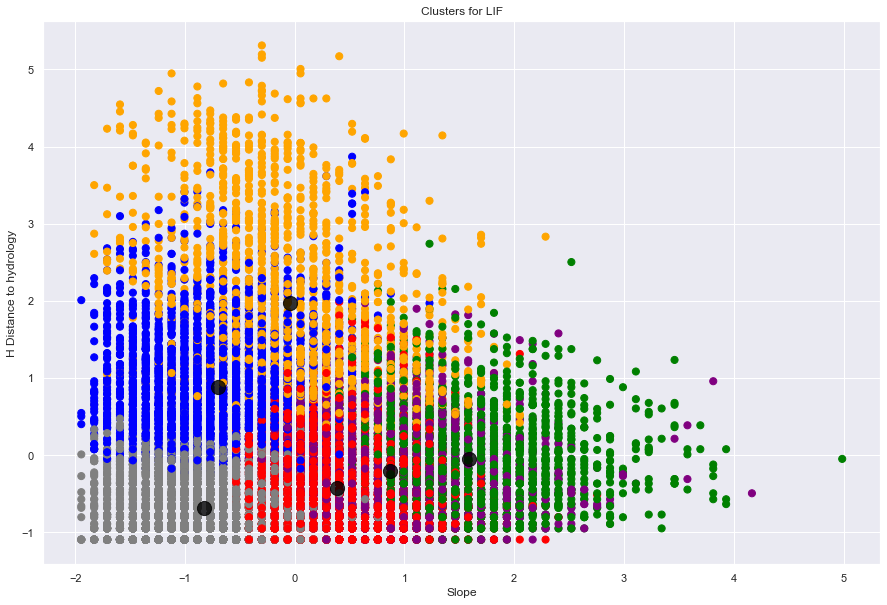

In [30]:
colors=np.array(["red","blue","green","purple","grey","orange"])

plt.figure(figsize=(15,10))
plt.title("Clusters for LIF")
plt.scatter(data4_lif.iloc[:, 0], data4_lif.iloc[:, 1], c=colors[y_kmeans], s=50)
plt.xlabel('Slope')
plt.ylabel('H Distance to hydrology')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);

In [31]:
y_kmeans.shape

(19229,)

In [32]:
data5 = data4.drop(data4_lif, axis=1)
data5["clust_lif"] = y_kmeans

In [33]:
data5

,Elevation,Aspect,Horizontal_Distance_To_Roadways,Hillshade_9am,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,clust_lif
0,0.987826,1.730651,2.172991,-0.552827,1.461593,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,0.844320,1.776146,2.732157,-0.257932,-0.316473,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,-0.172177,-1.144606,1.227805,0.135262,1.401182,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,4
3,0.815619,-1.035419,-0.083163,0.299092,-0.760990,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0.751042,-0.398495,-0.769004,1.249310,-0.699677,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,1.815374,-0.425792,0.433279,1.347609,1.764550,1,0,0,0,0,...,0,0,0,0,0,0,0,1,7,2
19225,1.038053,-0.880737,0.650649,0.495689,1.189293,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
19226,1.396817,0.220231,2.063556,0.364624,1.618481,0,0,1,0,0,...,1,0,0,0,0,0,0,0,7,4
19227,1.145682,-0.835243,-0.771253,0.528455,0.436410,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7,2


### Getting categories variable as 1 column

In [34]:
data6 = data5.copy()

Wilderness_Area

In [35]:
Wilderness_Area = data5.iloc[:, 5:9].idxmax(axis=1)
Wilderness_Area = Wilderness_Area.apply(lambda x : x[-1])
data6["Wilderness_Area"] = Wilderness_Area

In [36]:
Soil_Type = data5.iloc[:, 9:-2].idxmax(axis=1)
Soil_Type = Soil_Type.apply(lambda x : x[9:])
data6["Soil_Type"] = Soil_Type

In [37]:
dummies = list(data6.iloc[:,5:-4].columns)
data6 = data6.drop(dummies, axis=1)
data6.Wilderness_Area = data6.Wilderness_Area.astype("int64")
data6.Soil_Type = data6.Soil_Type.astype("int64")

In [38]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19229 entries, 0 to 19228
Data columns (total 9 columns):
Elevation                             19229 non-null float64
Aspect                                19229 non-null float64
Horizontal_Distance_To_Roadways       19229 non-null float64
Hillshade_9am                         19229 non-null float64
Horizontal_Distance_To_Fire_Points    19229 non-null float64
Cover_Type                            19229 non-null int64
clust_lif                             19229 non-null int32
Wilderness_Area                       19229 non-null int64
Soil_Type                             19229 non-null int64
dtypes: float64(5), int32(1), int64(3)
memory usage: 1.2 MB


### Random Forest with lif clustered

In [39]:
X_train_lif, X_test_lif, y_train_lif, y_test_lif = train_test_split(data6.drop("Cover_Type", axis=1),
                                                                data6.Cover_Type.astype(int),
                                                                test_size=1/3,
                                                                random_state=42)

In [40]:
rf_lif = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lif.fit(X_train_lif, y_train_lif)

pred_rf_lif = rf_lif.predict(X_test_lif)

cm_rf_lif = confusion_matrix(y_test_lif, pred_rf_lif)
print(cm_rf_lif)
acc_rf_lif = accuracy_score(y_test_lif, pred_rf_lif)
print(acc_rf_lif)
prec_rf_lif = precision_score(y_test_lif, pred_rf_lif, average='macro')
print(prec_rf_lif)

[[713 114   2   0  15   0  55]
 [154 584  28   0  95  29   4]
 [  0   3 770  61  10  99   0]
 [  0   0  32 848   0  26   0]
 [  0  23  11   0 876   8   0]
 [  1   4  94  29   6 818   0]
 [ 33   1   0   0   0   0 864]]
0.8538221528861154
0.851898073036689


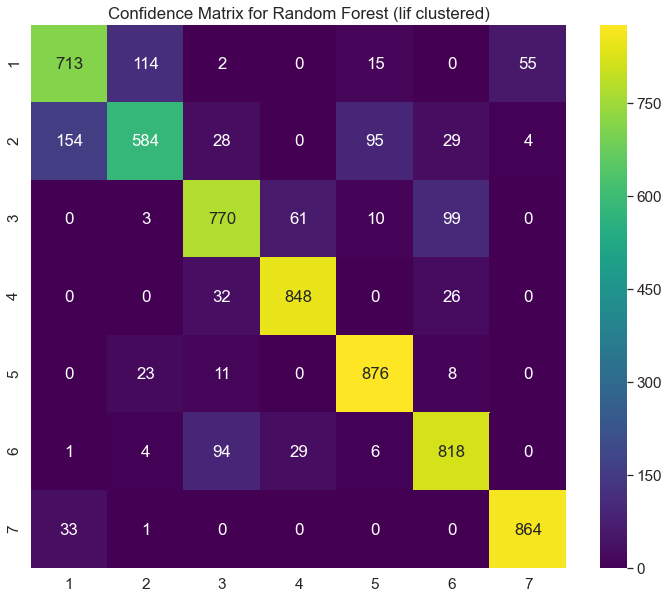

In [87]:
plt.figure(figsize=(12,10))
plt.title("Confidence Matrix for Random Forest (lif clustered)")
sns.set(font_scale=1.4)
sns.heatmap(cm_rf_lif, annot=True, fmt='g', xticklabels=["1","2","3","4","5","6","7"], yticklabels=["1","2","3","4","5","6","7"], cmap="viridis")

### Random Forest without lif clustered

Getting categories variable as 1 column

In [42]:
data7 = data4.copy()

In [43]:
Wilderness_Area = data4.iloc[:, 10:14].idxmax(axis=1)
Wilderness_Area = Wilderness_Area.apply(lambda x : x[-1])
data7["Wilderness_Area"] = Wilderness_Area

In [44]:
Soil_Type = data4.iloc[:, 14:-1].idxmax(axis=1)
Soil_Type = Soil_Type.apply(lambda x : x[9:])
data7["Soil_Type"] = Soil_Type

In [45]:
dummies2 = list(data7.iloc[:,10:-3].columns)
data7 = data7.drop(dummies2, axis=1)
data7.Wilderness_Area = data7.Wilderness_Area.astype("int64")
data7.Soil_Type = data7.Soil_Type.astype("int64")

In [46]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19229 entries, 0 to 19228
Data columns (total 13 columns):
Elevation                             19229 non-null float64
Aspect                                19229 non-null float64
Slope                                 19229 non-null float64
Horizontal_Distance_To_Hydrology      19229 non-null float64
Vertical_Distance_To_Hydrology        19229 non-null float64
Horizontal_Distance_To_Roadways       19229 non-null float64
Hillshade_9am                         19229 non-null float64
Hillshade_Noon                        19229 non-null float64
Hillshade_3pm                         19229 non-null float64
Horizontal_Distance_To_Fire_Points    19229 non-null float64
Cover_Type                            19229 non-null int64
Wilderness_Area                       19229 non-null int64
Soil_Type                             19229 non-null int64
dtypes: float64(10), int64(3)
memory usage: 1.9 MB


Model RF

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data7.drop("Cover_Type", axis=1),
                                                                data7.Cover_Type.astype(int),
                                                                test_size=1/3,
                                                                random_state=42)

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

cm_rf = confusion_matrix(y_test, pred_rf)
print(cm_rf)
acc_rf = accuracy_score(y_test, pred_rf)
print(acc_rf)
prec_rf = precision_score(y_test, pred_rf, average='macro')
print(prec_rf)

[[703 106   0   0  23   2  65]
 [154 579  26   0 101  30   4]
 [  0   1 789  42   8 103   0]
 [  0   0  12 882   0  12   0]
 [  1  28  10   0 872   7   0]
 [  0   7  88  36   6 815   0]
 [ 36   2   0   0   0   0 860]]
0.858034321372855
0.8555817874041999


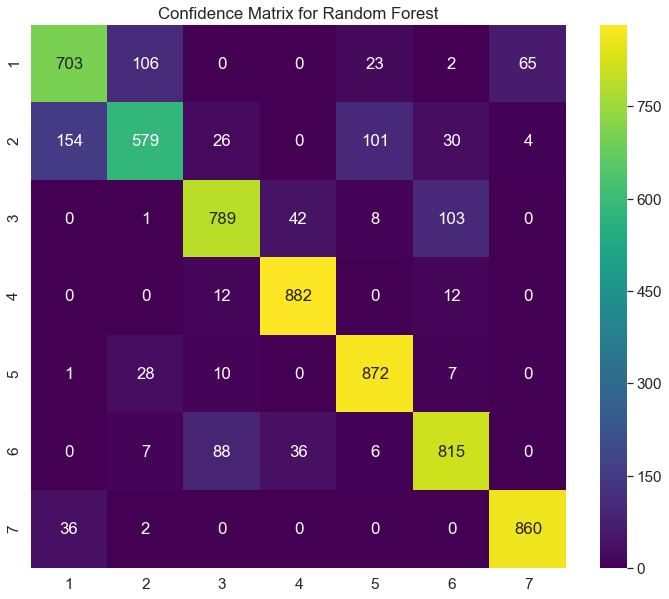

In [85]:
plt.figure(figsize=(12,10))
plt.title("Confidence Matrix for Random Forest")
sns.set(font_scale=1.4)
sns.heatmap(cm_rf, annot=True, fmt='g', xticklabels=["1","2","3","4","5","6","7"], yticklabels=["1","2","3","4","5","6","7"], cmap="viridis")

In [50]:
y_test.value_counts()

6    952
3    943
5    918
4    906
1    899
7    898
2    894
Name: Cover_Type, dtype: int64

In [51]:
pred_rf

array([1, 5, 7, ..., 5, 5, 6])

### Kmeans with the whole dataset (except categorical columns)

In [52]:
data8 = data7.iloc[:,:10]

In [53]:
data8

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,0.987826,1.730651,-0.417029,-0.480877,-0.587874,2.172991,-0.552827,0.004982,0.592238,1.461593
1,0.844320,1.776146,-0.887045,-0.272602,-0.604273,2.732157,-0.257932,0.266277,0.505390,-0.316473
2,-0.172177,-1.144606,-0.652037,-0.069171,-0.505879,1.227805,0.135262,-0.125665,-0.037409,1.401182
3,0.815619,-1.035419,-1.004549,-1.096014,-0.833861,-0.083163,0.299092,0.135630,0.027727,-0.760990
4,0.751042,-0.398495,0.640506,-0.369474,-0.522278,-0.769004,1.249310,-0.299861,-1.231567,-0.699677
...,...,...,...,...,...,...,...,...,...,...
19224,1.815374,-0.425792,1.698041,0.700962,1.019238,0.433279,1.347609,-1.257941,-2.078334,1.764550
19225,1.038053,-0.880737,-0.769541,-0.805398,-0.505879,0.650649,0.495689,-0.038567,-0.276241,1.189293
19226,1.396817,0.220231,-0.534533,-0.892583,-0.735466,2.063556,0.364624,1.224357,0.440254,1.618481
19227,1.145682,-0.835243,2.168056,1.374223,2.937933,-0.771253,0.528455,-3.043453,-2.404014,0.436410


In [54]:
data8 = data8.drop("Hillshade_3pm", axis=1)

In [89]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19229 entries, 0 to 19228
Data columns (total 9 columns):
Elevation                             19229 non-null float64
Aspect                                19229 non-null float64
Slope                                 19229 non-null float64
Horizontal_Distance_To_Hydrology      19229 non-null float64
Vertical_Distance_To_Hydrology        19229 non-null float64
Horizontal_Distance_To_Roadways       19229 non-null float64
Hillshade_9am                         19229 non-null float64
Hillshade_Noon                        19229 non-null float64
Horizontal_Distance_To_Fire_Points    19229 non-null float64
dtypes: float64(9)
memory usage: 1.3 MB


In [55]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data8)
    Sum_of_squared_distances.append(km.inertia_)

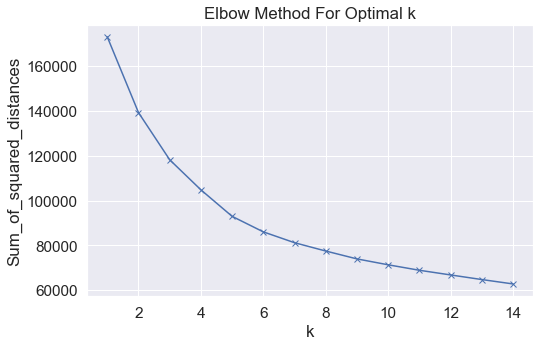

In [56]:
plt.figure(figsize=(8,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data8)

y_kmeans = kmeans.predict(data8)

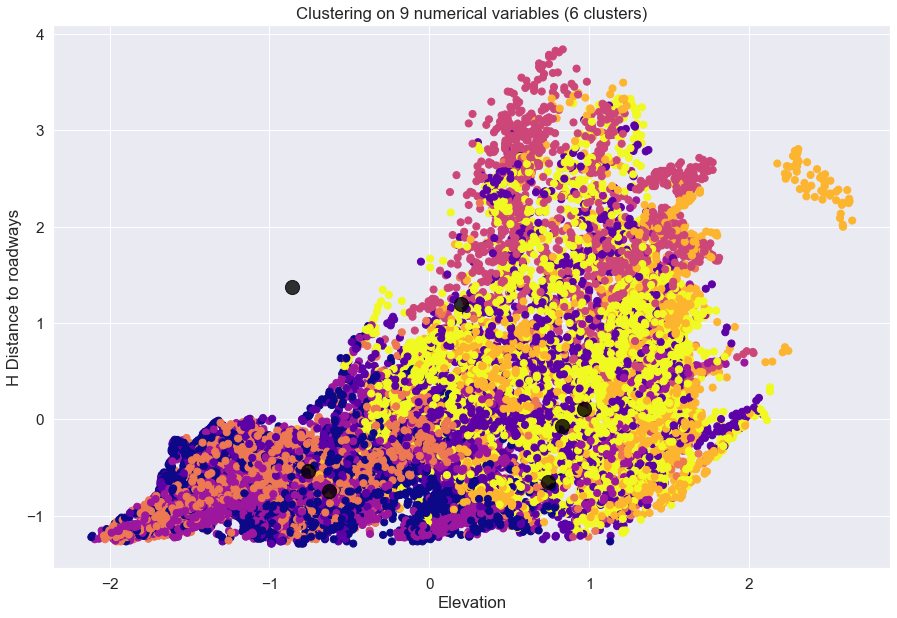

In [92]:
colors=np.array(["red","blue","green","purple","grey","orange","brown"])

plt.figure(figsize=(15,10))
plt.title("Clustering on 9 numerical variables (6 clusters)")
plt.scatter(data8.iloc[:, 0], data8.iloc[:, 5], c=y_kmeans, s=50, cmap="plasma")
plt.xlabel('Elevation')
plt.ylabel('H Distance to roadways')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8);

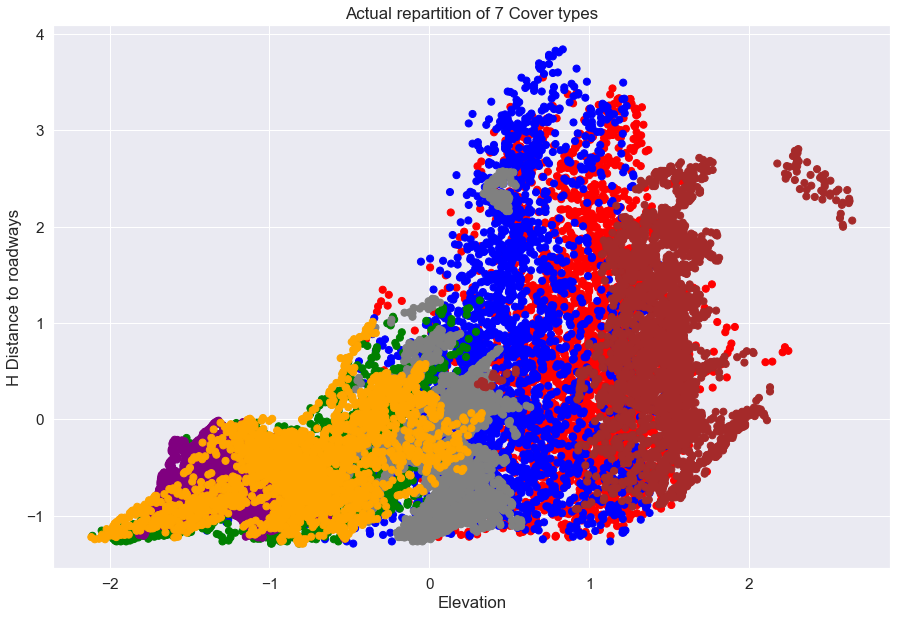

In [112]:
plt.figure(figsize=(15,10))
plt.title("Actual repartition of 7 Cover types")
plt.xlabel('Elevation')
plt.ylabel('H Distance to roadways')
plt.scatter(data6.iloc[:, 0], data6.iloc[:, 2], c=colors[data6.iloc[:, 5]-1], s=50)

In [93]:
data6

,Elevation,Aspect,Horizontal_Distance_To_Roadways,Hillshade_9am,Horizontal_Distance_To_Fire_Points,Cover_Type,clust_lif,Wilderness_Area,Soil_Type
0,0.987826,1.730651,2.172991,-0.552827,1.461593,1,4,1,23
1,0.844320,1.776146,2.732157,-0.257932,-0.316473,1,4,1,29
2,-0.172177,-1.144606,1.227805,0.135262,1.401182,1,4,3,10
3,0.815619,-1.035419,-0.083163,0.299092,-0.760990,1,4,3,31
4,0.751042,-0.398495,-0.769004,1.249310,-0.699677,1,0,1,29
...,...,...,...,...,...,...,...,...,...
19224,1.815374,-0.425792,0.433279,1.347609,1.764550,7,2,1,40
19225,1.038053,-0.880737,0.650649,0.495689,1.189293,7,4,1,29
19226,1.396817,0.220231,2.063556,0.364624,1.618481,7,4,3,33
19227,1.145682,-0.835243,-0.771253,0.528455,0.436410,7,2,1,30


- Kmeans with the whole dataset (no dummies/categorical data), compare with truth and with RF classification
- Plot better confusion matrix
- Plot the 3 scatter plots with labels found (4 with the truth)

If time :
- Search optimized params for RF (GridSearchCV)
- Data statistics
